<a href="https://colab.research.google.com/github/Ashujain121/Customer-Segmentation-using-RFM-and-Kmeans/blob/master/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_excel('/Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
### remove the duplicates of the customerid and country columns taken as a whole then group the data
### acc to the country and then take the aggregate ###

country_cust_data = df[['Country', 'CustomerID']].drop_duplicates()


In [6]:
country_cust_data = country_cust_data.groupby(['Country'])['CustomerID'].agg('count').reset_index().sort_values('CustomerID', ascending = False)

country_cust_data

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


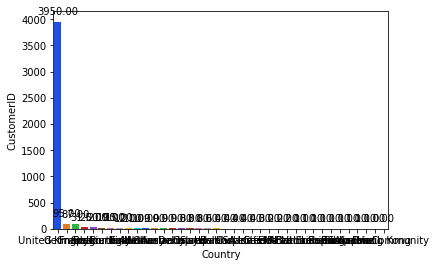

In [7]:

splot = sns.barplot(x=country_cust_data['Country'], y = country_cust_data['CustomerID'], palette = 'bright')

for p in splot.patches:
  
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points') 


In [8]:
## Keep only United Kingdom data

df = df.query("Country == 'United Kingdom'")

In [9]:
## Check the missing values
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [10]:
df = df[pd.notnull(df['CustomerID'])]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [12]:
#Check the min. of quantity and unitpricecolumn
print(df.Quantity.min())
print(df.UnitPrice.min())


-80995
0.0


In [13]:
# Filtering out the non-negative values in the Quantity column.
df = df[df.Quantity > 0]

In [14]:
df['TotalCost'] = df.Quantity*df.UnitPrice

In [15]:
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [16]:
print(df.shape)

(354345, 9)


In [17]:
#@title RFM MODELLING

In [18]:
import datetime as dt
latest_date = pd.to_datetime('2011-12-10', format='%Y-%m-%d')

RFMscores = df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (latest_date-x.max()).days, 'InvoiceNo':lambda x: len(x), 'TotalCost':lambda x: x.sum()})
RFMscores.head()

,InvoiceDate,InvoiceNo,TotalCost
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [19]:
RFMscores.dtypes

InvoiceDate      int64
InvoiceNo        int64
TotalCost      float64
dtype: object

In [20]:
RFMscores=RFMscores.rename(columns = {'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalCost':'Monetary'})
RFMscores.reset_index(inplace=True)
RFMscores.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


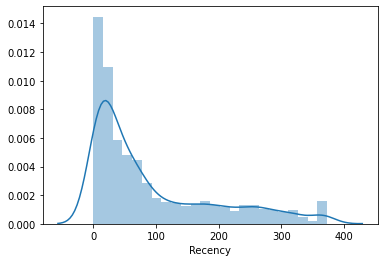

In [21]:
#@title Recency visualization

sns.distplot(RFMscores.Recency)

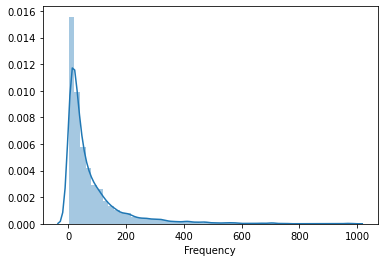

In [22]:
#@title Frequency score less than 1000
f = RFMscores.loc[(RFMscores.Frequency<1000),'Frequency']
sns.distplot(f)

In [23]:
quantiles = RFMscores.quantile(q=[0.25,0.5,0.75])
quantiles.head()

,CustomerID,Recency,Frequency,Monetary
0.25,14208.0,17.0,17.0,300.04
0.50,15569.0,50.0,41.0,651.82
0.75,16913.0,142.0,99.0,1575.89


In [24]:
def RScoring(x,p,d):
  if x<=p.loc[0.25,d]:
    return 1
  elif x<=p.loc[0.5,d]:
    return 2
  elif x<=p.loc[0.75,d]:
    return 3
  else:
    return 4

def FnMScoring(x,p,d):
  if x<=p.loc[0.25,d]:
    return 4
  elif x<=p.loc[0.5,d]:
    return 3
  elif x<=p.loc[0.75,d]:
    return 2
  else:
    return 1


In [25]:
RFMscores['R'] = RFMscores['Recency'].apply(RScoring, args =[quantiles,'Recency'] )
RFMscores['F'] = RFMscores['Frequency'].apply(FnMScoring, args =[quantiles,'Frequency'] )
RFMscores['M'] = RFMscores['Monetary'].apply(FnMScoring, args =[quantiles,'Monetary'] )

In [26]:
RFMscores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4596,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


In [27]:
## Add RFMgroup & RFMscore column to modify the dataset.

for i in range(RFMscores.shape[0]):
  RFMscores.loc[i,'RFMgroup'] = str(RFMscores.R[i])+str(RFMscores.F[i])+str(RFMscores.M[i])  

RFMscores['RFMscore'] = RFMscores.R + RFMscores.F + RFMscores.M

In [28]:
RFMscores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4596,33719.73,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


In [29]:
RFMscores.RFMscore.describe()

count    3921.000000
mean        7.508289
std         2.823461
min         3.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: RFMscore, dtype: float64

In [30]:
# Create loyalty_level column :

levels = ['Platinum', 'Gold', 'Silver', 'Bronze']
cut_score = pd.qcut(RFMscores.RFMscore, 4, labels=levels)
cut_score

0         Silver
1       Platinum
2       Platinum
3       Platinum
4       Platinum
          ...   
3916      Bronze
3917      Bronze
3918      Silver
3919    Platinum
3920    Platinum
Name: RFMscore, Length: 3921, dtype: category
Categories (4, object): [Platinum < Gold < Silver < Bronze]

In [31]:
RFMscores['loyalty_level'] = pd.Series(cut_score)
RFMscores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore,loyalty_level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [32]:
RFMscores[RFMscores['RFMgroup'] =='111'].head()
# VERIFIED

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore,loyalty_level
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
21,12839.0,2,314,5591.42,1,1,1,111,3,Platinum
23,12841.0,4,420,4022.35,1,1,1,111,3,Platinum


In [33]:
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMscores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("loyalty_level == 'Bronze'")['Recency'],
        y=graph.query("loyalty_level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("loyalty_level == 'Silver'")['Recency'],
        y=graph.query("loyalty_level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("loyalty_level == 'Gold'")['Recency'],
        y=graph.query("loyalty_level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("loyalty_level == 'Platinum'")['Recency'],
        y=graph.query("loyalty_level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMscores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("loyalty_level == 'Bronze'")['Frequency'],
        y=graph.query("loyalty_level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("loyalty_level == 'Silver'")['Frequency'],
        y=graph.query("loyalty_level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("loyalty_level == 'Gold'")['Frequency'],
        y=graph.query("loyalty_level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("loyalty_level == 'Platinum'")['Frequency'],
        y=graph.query("loyalty_level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMscores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("loyalty_level == 'Bronze'")['Recency'],
        y=graph.query("loyalty_level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("loyalty_level == 'Silver'")['Recency'],
        y=graph.query("loyalty_level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("loyalty_level == 'Gold'")['Recency'],
        y=graph.query("loyalty_level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("loyalty_level == 'Platinum'")['Recency'],
        y=graph.query("loyalty_level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)



In [34]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMscores['Recency'] = [handle_neg_n_zero(x) for x in RFMscores.Recency]
RFMscores['Monetary'] = [handle_neg_n_zero(x) for x in RFMscores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMscores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

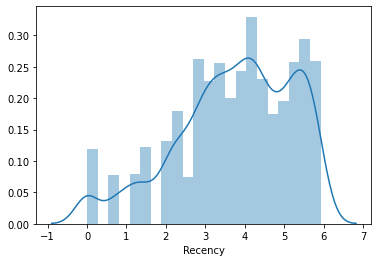

In [35]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

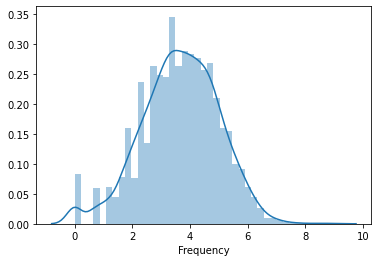

In [36]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

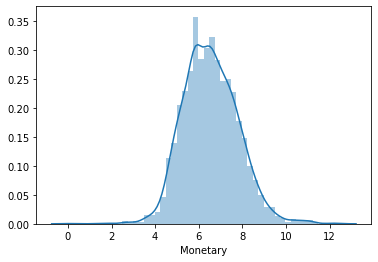

In [37]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)


In [39]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMscores.index, columns = Log_Tfd_Data.columns)

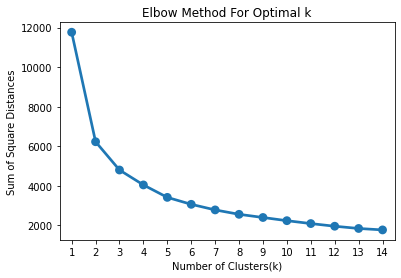

In [40]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [41]:
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMscores['Cluster'] = KMean_clust.labels_
RFMscores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore,loyalty_level,Cluster
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver,2
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum,0
2,12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,0
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum,0
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum,0


<Figure size 504x504 with 0 Axes>

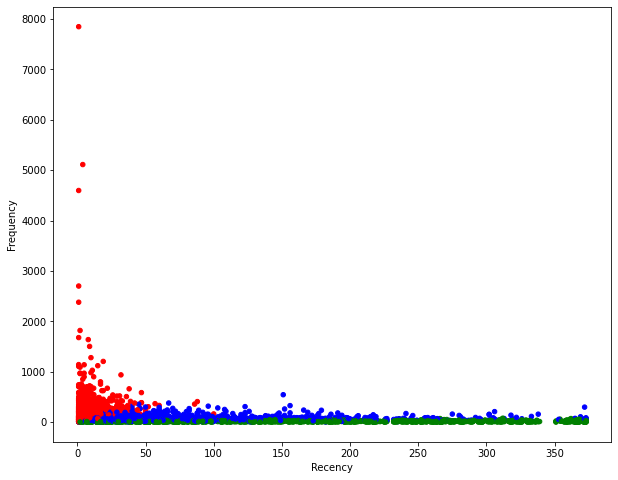

In [44]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMscores['Color'] = RFMscores['Cluster'].map(lambda p: Colors[p])
ax = RFMscores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMscores['Color']
)

In [46]:
RFMscores.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscore,loyalty_level,Cluster,Color
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver,2,blue
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum,0,red
2,12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,0,red
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum,0,red
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum,0,red
